In [1]:
import jax
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from tqdm import tqdm, trange

In [2]:
from jax.config import config
from model import NeuralCBF
from dynamics import DoubleIntegrator

In [3]:
config.update("jax_enable_x64", True)

In [136]:
dyn = DoubleIntegrator()
cbf = NeuralCBF(dyn, cbf_lambda=.2)
cbf.load("ckpts/checkpoint_3800/")
policy = jax.jit(cbf.policy, backend='cpu')

In [152]:
x = jnp.array([-.5, .2, 0., 0.])
x_target = jnp.array([.5, -.5, 0., 0.])
u_ref = jnp.array([1., 0.])

In [153]:
policy(x, u_ref)

(Array([1., 0.], dtype=float64),
 (Array(-0.15240703, dtype=float64),
  Array(0.02333955, dtype=float64),
  OptStep(params=KKTSolution(primal=Array([1., 0., 0.], dtype=float64), dual_eq=None, dual_ineq=Array([0., 0., 0., 0., 0.], dtype=float64)), state=OSQPState(iter_num=Array(1, dtype=int64, weak_type=True), error=Array(0., dtype=float64, weak_type=True), status=Array(1, dtype=int64, weak_type=True)))))

In [154]:
K = np.array([[1., 0., 1.7, 0.],
              [0., 1., 0., 1.7]])

In [155]:
dt = 1e-2
T = 15
N = int(T / dt) + 1
xs = np.zeros((N, x.shape[0]))
xs[0] = x
u = None
for i in trange(1, N):
    u_ref = K @ (x_target - xs[i-1])
    u, (h, hdot, sol) = policy(xs[i-1], u_ref)
    print(h, hdot, sol.params.primal[-1])
    xs[i] = xs[i - 1] + dt * dyn.dynamics(xs[i-1], u)

  1%|█                                                                                                                                            | 11/1500 [00:00<00:14, 103.99it/s]

-0.15240703439543107 0.027154838437136463 0.0
-0.15205628198428103 0.02696524853685842 0.002340369514326955
-0.15177773136281172 0.027694648579017066 0.0021474619503264194
-0.15149750403106638 0.031251783175559586 0.0027578186712318422
-0.1511820885265115 0.021454465714849602 0.001000101010562708
-0.15096742417436618 0.05021287623603116 0.0020811024245868887
-0.150457506526261 0.0658640696780262 0.0005242734090058547
-0.14979792003361345 0.061821978036285856 0.0028704436729810067
-0.14916367119065632 0.015804588480473176 0.005664224694070904
-0.1489952870023951 0.03147455431319279 0.006052378063492109
-0.1486803623056991 0.01761107777643298 0.00386711815650972
-0.14850437209138512 0.06197172807452703 0.0023955196821343846
-0.14786706182475087 0.08241036976428169 0.0007087475491990459
-0.14701819876088296 0.05978034175415302 0.0039257801273998505
-0.14641813357021238 0.10194210920381803 0.0005200562495514687
-0.14537019354570813 0.0595775652747447 0.005892528961703233
-0.144774797441702

  3%|████▊                                                                                                                                        | 51/1500 [00:00<00:08, 174.61it/s]

-0.1390325333488086 0.034358531900235294 0.010759921372185543
-0.13868765447227202 0.03277771750406374 0.008739135072674521
-0.13835872052760687 0.03743905917191051 0.0026928286317413966
-0.13798439124429626 0.032973846240597474 0.002241963002720988
-0.13765420821025046 0.03306785890629668 0.003937841126939902
-0.13732330367842585 0.032362837477629185 0.002182803453492139
-0.13699949754273896 0.029642538028962193 0.0018911585466962243
-0.13670260473523738 0.02971070596591786 0.0025218118117204358
-0.136405259632191 0.029784511228370156 0.002517139573186961
-0.1361073329535527 0.029742717380035377 0.002516064845153703
-0.13580991661871886 0.029674143945840642 0.002517930989433466
-0.1355132537086411 0.029595036168078882 0.0025180078782113015
-0.13521743304012956 0.029558523199587572 0.002515687828492593
-0.134922016375506 0.029497702146677938 0.002513748737284097
-0.1346272270124276 0.02943703956953555 0.002511951533667416
-0.1343330566533281 0.029376990945397367 0.002510679715572991
-0

  6%|█████████                                                                                                                                    | 96/1500 [00:00<00:06, 202.68it/s]

-0.1260509759867439 0.02775602323981968 0.002545900752909553
-0.1257736580701176 0.027702065927108624 0.0025474102716224393
-0.12549688036805623 0.027645911980582322 0.0025464622385350803
-0.1252206659836278 0.027591838283872665 0.0025476279710337215
-0.12494499365602915 0.027540111802423693 0.0025511898696750383
-0.12466983926727698 0.027486244870149005 0.0025523566624272437
-0.12439522420095574 0.027432406746253413 0.0025534398273426907
-0.12412114817419902 0.027376442787285047 0.002552136447443635
-0.12384763234713778 0.027325088812585635 0.0025556422629473513
-0.12357463034653846 0.027269261848329514 0.0025542576056118847
-0.12330218756983591 0.027215735552115275 0.002555217279940768
-0.12303028071004016 0.027164642623172197 0.0025586652601660817
-0.12275888579719375 0.02710897743194055 0.0025571214379724173
-0.1224880495408601 0.027057877722629263 0.0025603434439986986
-0.12221772495233518 0.02700229627695586 0.0025586742041236493
-0.1219479567988405 0.026949139597727472 0.0025594

  9%|█████████████▏                                                                                                                              | 141/1500 [00:00<00:06, 211.42it/s]

-0.1140958636811859 0.02543639763261606 0.0026174319015322286
-0.11384180440279683 0.025387059424114233 0.002618445989766177
-0.11358823987793878 0.025339871129055527 0.00262201780464772
-0.11333514865560242 0.02529282215137988 0.0026255912542339516
-0.11308252934533412 0.02524586345612251 0.0026291593887538263
-0.11283038104663679 0.025198929799402865 0.002632644245826284
-0.11257870351084562 0.02515218557069837 0.0026362434114702285
-0.11232749484905306 0.025105473727755363 0.002639768812038088
-0.11207675473990103 0.025058878672050033 0.0026433220571218776
-0.11182648202007238 0.025012421208405595 0.002646928486101802
-0.11157667662090504 0.024965801063511126 0.002650245354762542
-0.11132733944526473 0.024919436677526073 0.0026537593430272805
-0.1110784679595161 0.02487523597795881 0.002659766191585892
-0.11083004007454784 0.024827019978028983 0.0026608043178792612
-0.11058209628741376 0.02478099742207761 0.002664349914570991
-0.11033461990647699 0.024737949002498677 0.0026712660825

 12%|█████████████████▎                                                                                                                          | 185/1500 [00:01<00:07, 176.52it/s]

-0.10500536363263312 0.023735395646836764 0.0027346929696469347
-0.10476841745169967 0.023689940987318005 0.00273661332056068
-0.10453192762179431 0.023645719587020102 0.0027397184753905246
-0.10429588008454922 0.02360200079169286 0.0027433121211506905
-0.10406027253012405 0.02355889326831955 0.0027471767626691137
-0.10382509741822771 0.02351347464570727 0.0027481196902613024
-0.10359037433255865 0.023471441407480937 0.002753680339921269
-0.10335607398144868 0.023428029408182303 0.0027571671366797223
-0.10312220993422819 0.02338295290853043 0.002758201939948888
-0.1028887990349188 0.023341709978000755 0.002764260069549181
-0.10265580300769285 0.023296809339864555 0.002765354284742003
-0.10242325849315634 0.023253779003641138 0.002768802050545354
-0.1021911472412415 0.023212918871513354 0.0027749856618593002
-0.10195944740098567 0.02317024141100735 0.0027786751656712974
-0.10172817764811776 0.023127414917490926 0.002782097461695266
-0.1014973387224372 0.02308460175350454 0.0027854341439

 15%|█████████████████████▍                                                                                                                      | 230/1500 [00:01<00:06, 199.35it/s]

-0.09763810177169327 0.022367859267313116 0.002839939290184879
-0.0974148939156022 0.022326441390099806 0.0028431554878174817
-0.09719210277418358 0.022285055056372863 0.0028463041116114246
-0.09696972804021349 0.022245948971366572 0.002852292685105811
-0.096747747385657 0.022204645014988852 0.0028554203523387675
-0.09652618332712988 0.022161283131960873 0.002855748062732061
-0.09630505385965084 0.02212270006401867 0.002861997602728508
-0.09608430772498329 0.022082896041803395 0.002866304422139127
-0.09586396225518946 0.02204113328557231 0.0028680658377586306
-0.09564403668872493 0.02200369243218451 0.0028751274679513234
-0.09542448772526464 0.021964226205309533 0.002879566056748382
-0.09520533546760955 0.02192485906001612 0.002884035044510295
-0.09498657794305707 0.021885605417493598 0.0028885323383630174
-0.0947682112429894 0.021846525193793747 0.0028931290541860384
-0.09455023737506582 0.02180747555206981 0.0028976766354386133
-0.09433265508972422 0.021766346004459553 0.002899584877

 18%|█████████████████████████▌                                                                                                                  | 274/1500 [00:01<00:05, 207.30it/s]

-0.0877670547401616 0.02072857327521153 0.003174912632661219
-0.08756042672700316 0.02069996692975238 0.0031876301372208873
-0.08735410333963356 0.020669535815322375 0.0031984549425421917
-0.08714809335849177 0.02063894264663298 0.003209056382333197
-0.08694239273691001 0.020611069727030727 0.003222858513583431
-0.08673697441613945 0.020578320544978136 0.0032306605591129515
-0.08653188681898936 0.020548180861275144 0.0032415309184856884
-0.08632710383287784 0.020518294354978695 0.003252612748763581
-0.08612262322509634 0.020488455879004865 0.003263661487972044
-0.08591844335784639 0.020461225409171828 0.003277804061648242
-0.08571453947506498 0.020431757179865482 0.003289128467399252
-0.0855109328408451 0.020398947784104362 0.0032964997117252747
-0.08530765463674954 0.02036813625292657 0.0033063381009414247
-0.08510468887787213 0.020338156097025755 0.0033169524165013353
-0.08490203132233888 0.020309380306920404 0.003328706654261287
-0.08469966413284999 0.020280630982480858 0.0033404291

 21%|█████████████████████████████▋                                                                                                              | 318/1500 [00:01<00:05, 212.50it/s]

-0.07895906020639104 0.019403574169295393 0.003611490679924904
-0.0787658549443821 0.0193700553328117 0.003616614561903026
-0.07857300315191247 0.019337224536261532 0.0036223515645626976
-0.0783804830411666 0.019304617195760425 0.003628239993516948
-0.07818829343507717 0.019272253762899243 0.003634305548286654
-0.07799643135130141 0.0192402775226649 0.0036407018893663077
-0.07780489376494892 0.01920844283713599 0.00364717581724365
-0.07761367933781453 0.01917671025380248 0.0036536752540836863
-0.07742278738576633 0.019145439984647423 0.0036605715734772098
-0.0772322153103612 0.01911418752428477 0.003667440769608101
-0.0770419614289107 0.01908558009327223 0.003677500403470283
-0.07685199638281623 0.019050932917477066 0.003680208033942723
-0.07666238300505658 0.019019177320364046 0.0036863833638671553
-0.07647309324551442 0.01899032076975824 0.003696031972021224
-0.07628411803211496 0.019002090578770264 0.0036951177756705624
-0.07609503596955641 0.01892816362321072 0.003708807462250678
-

 24%|█████████████████████████████████▉                                                                                                          | 363/1500 [00:01<00:05, 215.84it/s]

-0.0705850314883496 0.01788466825093705 0.003767213149448598
-0.07040727769816725 0.017837499941262713 0.0037556158563952936
-0.07022999455482871 0.017787358741096854 0.0037409387338350982
-0.07005321527558236 0.017736443697337262 0.0037253911072495
-0.06987695045863777 0.017684426440780436 0.0037086029591347747
-0.06970121684955012 0.017633683706314136 0.0036930239835771617
-0.06952599808073381 0.017582774688459552 0.003677143409702554
-0.06935129577544656 0.017531956083956527 0.003661290031327462
-0.06917710903482552 0.01748106680439322 0.0036452340687001786
-0.06900343923281824 0.01743045445917091 0.003629326604137378
-0.06883028204812933 0.017380021639152126 0.0036135229860030575
-0.06865763667502167 0.017329649982493082 0.00359768271885942
-0.0684854957554609 0.017282055556534153 0.003585389476292838
-0.06831383969485584 0.017229292993347457 0.00356607940010649
-0.06814272074256315 0.01717905360418237 0.003550054335308423
-0.06797208597597 0.01713372244816099 0.0035388328758547845

 26%|███████████████████████████████████▉                                                                                                        | 385/1500 [00:02<00:06, 165.85it/s]

-0.06318946312399215 0.01609284753758318 0.0034544673802503296
-0.06302986371945521 0.016052536628948306 0.0034460499805631633
-0.06287067723535669 0.016012035100178457 0.003437389617343106
-0.0627119044542492 0.015971498757513632 0.003428631214147296
-0.06255354572117568 0.0159313230602121 0.003420123940274884
-0.06239560348093843 0.015892913972299184 0.003413310324926298
-0.06223805488832355 0.015854715925861646 0.0034066129632463428
-0.0620808983538086 0.01581631739990002 0.0033996359515801513
-0.06192414683425425 0.015772750870982042 0.0033874301349125454
-0.061767851083905756 0.015728057783037652 0.0033740013465894864
-0.06161201329072709 0.015683544415082275 0.0033606657456513194
-0.061456629997080105 0.0156390334876652 0.0033472626883314423
-0.06130170122690561 0.015594108937597348 0.0033333291616882425
-0.0611472373406151 0.01554963469278985 0.0033197299328722443
-0.060993234428408996 0.01550689267571838 0.0033077918783711692
-0.06083970367198765 0.0154667227247106 0.0032983193

 29%|████████████████████████████████████████▏                                                                                                   | 430/1500 [00:02<00:05, 189.40it/s]

-0.059776374506523976 0.015193410052591956 0.003237666173855002
-0.05962606939428502 0.015155370887637323 0.003229633765030261
-0.059476154015709076 0.015117802262841004 0.0032220375352079423
-0.05932662520819236 0.015080447690555863 0.0032145773037090034
-0.05917748051769995 0.015043281472836161 0.0032072056855455174
-0.05902871844599685 0.01500630252011817 0.003199958488557273
-0.05888033745797828 0.014969369326976087 0.003192627028647402
-0.058732337253324905 0.014932725719983397 0.003185632747584688
-0.0585847115291985 0.014897095968307284 0.0031796171298558544
-0.05843745324169356 0.014861799180346111 0.003173910395581836
-0.058290559916993 0.01482700354407665 0.0031680643695566274
-0.058144015109319123 0.014793507244054425 0.003163846494255476
-0.05799782250962064 0.014758493952626558 0.0031583796176664525
-0.05785199529976398 0.014723405750691552 0.003152359899398035
-0.05770653138514328 0.014688138919886483 0.0031461434535091965
-0.05756143016877914 0.014652856925883301 0.00313

 30%|██████████████████████████████████████████▎                                                                                                 | 453/1500 [00:02<00:05, 198.06it/s]

-0.05351188229162252 0.01374859358140491 0.003035458925488215
-0.05337689779702378 0.013734139200526463 0.0030380633054129013
-0.05324208857948399 0.013686875319763238 0.003046667459673107
-0.053107781612976024 0.013631309910618228 0.0030555655820049712
-0.052974060644182794 0.013521684319066448 0.0030718551717278694
-0.05284147314149981 0.013596395718855696 0.003054875458468827
-0.052708179781752386 0.013614631496883878 0.0030564093417398976
-0.052574739633577776 0.01359116862334805 0.003065887363503832
-0.05244159446898455 0.013572440815521941 0.003072898308816047
-0.05230870233915484 0.01359912441461472 0.0030740483394720245
-0.052175589045914655 0.013536809807602686 0.0030909793305125472
-0.052043139138911364 0.013543468410301983 0.0030967173078115875
-0.0519106707443874 0.013524808746845278 0.0031120127130582383
-0.05177845363672131 0.013408051643014045 0.0031406558687401076
-0.051647445847397236 0.013453876143324538 0.003138401672519803
-0.051516039883475154 0.013441648992777095 

 33%|██████████████████████████████████████████████▍                                                                                             | 497/1500 [00:02<00:04, 205.74it/s]

-0.047944825558941036 0.012590229227008 0.002880951905918978
-0.04783457552965867 0.012521082664916063 0.002643128834249395
-0.04772599199491455 0.011877365327681846 0.0025703801546868538
-0.047626383933774975 0.011577962487231096 0.002260398903729131
-0.047534080043824374 0.010663725533690101 0.0019948423845924717
-0.04744892407812415 0.011528509073209955 0.0016314342587625968
-0.04735684383327963 0.011347687192117071 0.0014455109942856442
-0.047266429808704845 0.011128110631905259 0.001293809693963034
-0.0471771618970743 0.011066837772397984 0.001173253213456135
-0.04708723331894892 0.010336875812985622 0.0011132086804748816
-0.04700379906779606 0.010223674814270433 0.0010400559731726946
-0.0469217580198161 0.01062548424405449 0.0009565797275462042
-0.04683199968316679 0.009690863259944416 0.0009378651777354186
-0.046750271575398704 0.011082400284728969 0.0008670361654838669
-0.046653715476560026 0.01039251546783359 0.0008528165141886413
-0.046564369096899066 0.010757895261164116 0.0

 36%|██████████████████████████████████████████████████▋                                                                                         | 543/1500 [00:02<00:04, 215.08it/s]

-0.04402638023373824 0.008849838887703881 0.00028434910357853966
-0.043951967079797184 0.009925319472059883 0.00026650406599997424
-0.04386710143258997 0.008578703913259683 0.00026211992636539634
-0.043796014453595045 0.0013869220885346033 0.00029004662154465246
-0.043797791463264395 0.008721527065333468 0.00023623576629360922
-0.04372593695198148 0.009233357509248336 0.00022266478672020783
-0.043648808895236334 0.00867165242220166 0.0002136785422875438
-0.043577482389041786 0.008691018378159785 0.00020273393956658127
-0.043505885787240496 0.008672234472345408 0.00019232959498149052
-0.04343468232871659 0.00865865123022882 0.0001822380798624111
-0.04336370516590112 0.009039871204302333 0.00017059927404919044
-0.043288609410099495 0.009156869005404997 0.0001612786484164311
-0.04321227163837908 0.007808186118280332 0.00015771007789951324
-0.043150921079788025 0.008946845678840592 0.00014337247353757909
-0.04307901985326135 0.008325488826945263 0.00013603489693777323
-0.04301252731575318 

 39%|██████████████████████████████████████████████████████▉                                                                                     | 589/1500 [00:03<00:05, 180.05it/s]

-0.04507038938968061 -0.035369111584932535 0.0
-0.04544233131906303 -0.03733641344746116 0.0
-0.045832602690967096 -0.03908205088696037 0.0
-0.04624027441381844 -0.040823511494015384 0.0
-0.046663625893008445 -0.04210227019813569 0.0
-0.04709660136001639 -0.04289167643596693 0.0
-0.04753674769337994 -0.043541540274363084 0.0
-0.04798399840044558 -0.044370459178844024 0.0
-0.048439922941380616 -0.04524950479466828 0.0
-0.048904567118040754 -0.046123719852752425 0.0
-0.0493778398435981 -0.04698769290684823 0.0
-0.04985923285491742 -0.047765644858186636 0.0
-0.050348411279222335 -0.04854760687928202 0.0
-0.05084532971192259 -0.049324620064591186 0.0
-0.05134988352929109 -0.05005625306041843 0.0
-0.05186092407991123 -0.050662119552544085 0.0
-0.052378021550044486 -0.051280122435848195 0.0
-0.05290122137485493 -0.051892312082962515 0.0
-0.053430433259812914 -0.05251166536478036 0.0
-0.05396619938465581 -0.05319707211557807 0.0
-0.05450876700935341 -0.053883540806334965 0.0
-0.05505817535383

 42%|██████████████████████████████████████████████████████████▉                                                                                 | 632/1500 [00:03<00:04, 185.98it/s]

-0.057326480034967243 -0.057428399206886 0.0
-0.05791102294963189 -0.05810133178182394 0.0
-0.05850224834777635 -0.05877364610056369 0.0
-0.059100129993586346 -0.059440670270173496 0.0
-0.05970459791439135 -0.06009866357850826 0.0
-0.060315600679790436 -0.06075750810999409 0.0
-0.06093315542732648 -0.06142344898909352 0.0
-0.06155746397339093 -0.062109919587176314 0.0
-0.06218874466359505 -0.06286479906905781 0.0
-0.06282820897853014 -0.06371350293128103 0.0
-0.06347611916574783 -0.06455886361937214 0.0
-0.06413246859563508 -0.06541102807900062 0.0
-0.06479745552094696 -0.06630494583775624 0.0
-0.06547152540023622 -0.06723317730935499 0.0
-0.06615518779455931 -0.06821171759114976 0.0
-0.06684893170771333 -0.06928975472966281 0.0
-0.06755385328748795 -0.0704204024231781 0.0
-0.06827002267128081 -0.07153756808784936 0.0
-0.06899727697225236 -0.07264209957139799 0.0
-0.06973550133386865 -0.07373508493289567 0.0
-0.07048458196287792 -0.07481668391512027 0.0
-0.07124440656883127 -0.07588716

 45%|███████████████████████████████████████████████████████████████▏                                                                            | 677/1500 [00:03<00:04, 200.76it/s]

-0.08917428971612439 -0.0921782894315635 0.0
-0.09010480904311417 -0.09272503262844031 0.0
-0.09104071489559777 -0.09325831024489518 0.0
-0.09198192930192466 -0.09379449660550115 0.0
-0.09292853455308693 -0.09433555064773544 0.0
-0.09388052904178439 -0.09487436416603394 0.0
-0.09483788698603664 -0.0954078566943405 0.0
-0.09580044198484723 -0.09590980132983307 0.0
-0.09676765448192551 -0.09634868888994987 0.0
-0.09773916061922305 -0.09677189272010321 0.0
-0.09871482924059832 -0.09718767646021564 0.0
-0.09969464740893551 -0.09760310906863857 0.0
-0.10067861991976602 -0.09802105036942663 0.0
-0.10166672691254906 -0.09843192194729226 0.0
-0.10265889098769047 -0.09883493569281836 0.0
-0.10365494285382197 -0.09920126354847003 0.0
-0.10465435325797401 -0.09951934261228028 0.0
-0.1056569988863331 -0.09985061837388308 0.0
-0.10666279141694882 -0.10015293825719422 0.0
-0.10767159000454218 -0.10045497978390742 0.0
-0.10868338319275886 -0.10075407035100137 0.0
-0.10969814971049367 -0.1010516138171

 48%|███████████████████████████████████████████████████████████████████▍                                                                        | 723/1500 [00:03<00:03, 211.51it/s]

-0.13473292884185348 -0.10472942162876968 0.0
-0.13578528295756606 -0.10464415184509877 0.0
-0.13683675570331627 -0.10455373777597442 0.0
-0.1378872351065727 -0.1044473400678985 0.0
-0.13893659001875355 -0.10433079214596108 0.0
-0.1399844060403765 -0.1041441455797281 0.0
-0.14103030880362868 -0.10395080878477324 0.0
-0.14207422515802834 -0.10375001576559695 0.0
-0.14311608467446438 -0.10354207093816342 0.0
-0.1441559305460657 -0.10336458118507827 0.0
-0.1451941423823397 -0.10320684085587241 0.0
-0.1462305532643641 -0.10300961739612227 0.0
-0.1472650213681144 -0.1028144163443038 0.0
-0.14829753644611424 -0.10262625061263211 0.0
-0.1493281808021505 -0.10243756064427145 0.0
-0.15035688399581085 -0.10223999182656843 0.0
-0.15138354766031567 -0.10203388802557868 0.0
-0.15240800424181 -0.10173334571151936 0.0
-0.15342799641308438 -0.10120510586892392 0.0
-0.1544424445260328 -0.10063512525802766 0.0
-0.15545115634855447 -0.1000623322033037 0.0
-0.1564541046899405 -0.09948689575911751 0.0
-0.1

 50%|█████████████████████████████████████████████████████████████████████▋                                                                      | 746/1500 [00:03<00:03, 214.58it/s]

-0.1786143664488314 -0.0835871301181394 0.0
-0.17945122839507574 -0.08287679342332577 0.0
-0.18028103242065344 -0.08218147164706203 0.0
-0.18110382471696296 -0.08148010438520968 0.0
-0.18191960098340154 -0.08078512701695563 0.0
-0.18272842206993875 -0.08009392696682914 0.0
-0.18353030999372363 -0.07940338868263969 0.0
-0.18432527139476396 -0.07871601735701547 0.0
-0.18511335492331815 -0.07803292607021603 0.0
-0.1858945753078002 -0.07734678884982298 0.0
-0.18666888859945344 -0.07665945129647099 0.0
-0.1874363138301081 -0.07597487942351415 0.0
-0.18819687690093714 -0.07529276535083902 0.0
-0.188950602754683 -0.07461316419927737 0.0
-0.18969751908795524 -0.07393664352636733 0.0
-0.19043765523155184 -0.07326260445993381 0.0
-0.1911710028734878 -0.07258502266464784 0.0
-0.1918975640968026 -0.0719108768190959 0.0
-0.19261736979600566 -0.07123958158094433 0.0
-0.19333044856667791 -0.07056887592035822 0.0
-0.19403677092428415 -0.0698964992617307 0.0
-0.19473635845131676 -0.06922756363912058 0.

 53%|█████████████████████████████████████████████████████████████████████████▊                                                                  | 791/1500 [00:03<00:03, 217.23it/s]

-0.20954802246304127 -0.053916696285141466 0.0
-0.21008749944911326 -0.05332458088117591 0.0
-0.21062102854632933 -0.05273264662101271 0.0
-0.21114863199735545 -0.052144813628182504 0.0
-0.21167034709006385 -0.0515595788879738 0.0
-0.21218619460346594 -0.05097735395854827 0.0
-0.21269621409491454 -0.050399264611415966 0.0
-0.213200447037575 -0.049825307976445674 0.0
-0.21369893003085366 -0.04925392652765697 0.0
-0.21419168232408475 -0.048685003987548166 0.0
-0.21467873139081473 -0.04811838065947915 0.0
-0.21516010820516543 -0.047555885827286606 0.0
-0.21563585549146988 -0.04699765013814049 0.0
-0.21610601567189805 -0.046443593988869054 0.0
-0.21657063068745794 -0.045893741161027395 0.0
-0.2170297399037888 -0.045347544667851326 0.0
-0.2174833829799067 -0.044805581549516686 0.0
-0.21793160233671538 -0.04426784152629043 0.0
-0.21837444029057917 -0.04373431395777744 0.0
-0.21881193904975088 -0.043204987852534064 0.0
-0.21924413999565376 -0.04267960111568565 0.0
-0.21967108483721648 -0.0421

 54%|████████████████████████████████████████████████████████████████████████████                                                                | 815/1500 [00:04<00:03, 221.00it/s]

-0.228452334331315 -0.030914986635388258 0.0
-0.22876155739707726 -0.030491696099334657 0.0
-0.22906652532891517 -0.030069696269935373 0.0
-0.22936726452129097 -0.029649821104651444 0.0
-0.22966379966393166 -0.029233619983412333 0.0
-0.22995617176098132 -0.028820937276311503 0.0
-0.2302443884846258 -0.02840740883432471 0.0
-0.23052847176062308 -0.02799826892463123 0.0
-0.23080846261607987 -0.027593093697679903 0.0
-0.2310844007328369 -0.02719186056154255 0.0
-0.231356325565864 -0.026794546820095737 0.0
-0.2316242783109364 -0.02640153634755975 0.0
-0.23188830019016957 -0.0260124059551236 0.0
-0.23214842987325313 -0.025627116211704624 0.0
-0.23240470579780673 -0.025245644238140557 0.0
-0.23265716247829576 -0.02486371009331158 0.0
-0.23290568008744816 -0.024465559564369632 0.0
-0.2331502178648523 -0.024071883035471392 0.0
-0.23339082064679356 -0.023682642634404165 0.0
-0.2336275325321973 -0.023297776710955145 0.0


 57%|████████████████████████████████████████████████████████████████████████████████▎                                                           | 861/1500 [00:04<00:03, 180.43it/s]

-0.23386039737313213 -0.022917263963919958 0.0
-0.234089458685966 -0.02254106766894466 0.0
-0.23431475961974166 -0.022169151261339653 0.0
-0.23453634258659167 -0.021801331360062716 0.0
-0.23475424782885254 -0.021437577006514413 0.0
-0.23496851708111435 -0.021077997729420414 0.0
-0.2351791920783886 -0.020722557650551407 0.0
-0.23538631439079197 -0.02037125997912783 0.0
-0.23558992599935094 -0.020024371988876282 0.0
-0.2357900732303021 -0.019681845852921504 0.0
-0.23598679085956875 -0.019342108810327465 0.0
-0.2361801112382758 -0.019006197409095475 0.0
-0.23637007403980045 -0.018674237417740266 0.0
-0.2365567182722842 -0.01834607816898909 0.0
-0.23674008221701912 -0.018021781453618605 0.0
-0.2369201694381304 -0.01769366268587772 0.0
-0.23709697641556587 -0.017369965139246116 0.0
-0.2372705482286014 -0.017050163895792635 0.0
-0.23744092382256235 -0.016734224404919385 0.0
-0.23760814179723377 -0.016422112278709423 0.0
-0.2377722404084943 -0.016113793294011202 0.0
-0.23793325756997083 -0.01

 60%|████████████████████████████████████████████████████████████████████████████████████▋                                                       | 907/1500 [00:04<00:02, 200.62it/s]

-0.2410640791700233 -0.009381628293404809 0.0
-0.24115784441572843 -0.009169091545833353 0.0
-0.24124948521095865 -0.008959350487951566 0.0
-0.24133902993685913 -0.008752531133016078 0.0
-0.24142650831073836 -0.008548575116804331 0.0
-0.24151194802494946 -0.008347326820016165 0.0
-0.2415953760392476 -0.00814875339798152 0.0
-0.2416768192169867 -0.00795284561330486 0.0
-0.2417563041981931 -0.007759575836141273 0.0
-0.24183385791158662 -0.0075696161315298455 0.0
-0.241909533972803 -0.0073858382204655786 0.0
-0.24198337154657754 -0.00720391794436971 0.0
-0.2420553838199629 -0.007023417146005279 0.0
-0.24212559063127564 -0.00684523276715088 0.0
-0.2421940162742629 -0.0066694890899512485 0.0
-0.2422606851407627 -0.0064961599973350544 0.0
-0.24232562136171326 -0.006325219608521629 0.0
-0.2423888488095145 -0.006156642277449927 0.0
-0.2424503911003683 -0.0059904025911990365 0.0
-0.2425102715966123 -0.0058264753684008404 0.0
-0.24256851340902813 -0.005664835657645978 0.0
-0.24262513939913954 -0

 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 953/1500 [00:04<00:02, 210.60it/s]

-0.2435546333539376 -0.002297482540755597 0.0
-0.24357759584446145 -0.002187175659911584 0.0
-0.24359945558450577 -0.0020785686015769617 0.0
-0.24362022956406637 -0.0019716420613026257 0.0
-0.24363993458027416 -0.0018663769208954021 0.0
-0.24365858723925485 -0.0017627542468306558 0.0
-0.24367620395796993 -0.0016607552886726158 0.0
-0.24369280096604953 -0.001560361477502945 0.0
-0.24370839430760177 -0.0014615544243576604 0.0
-0.24372299984300838 -0.0013643159186723683 0.0
-0.24373663325070974 -0.001268627926736466 0.0
-0.24374931002896724 -0.0011744725901559588 0.0
-0.24376104549761388 -0.001081832224325397 0.0
-0.24377185398049658 -0.0009904382863709124 0.0
-0.24378174765156788 -0.0009003981094669204 0.0
-0.24379074118871377 -0.0008118336928835638 0.0
-0.2437988493425612 -0.0007247277452424477 0.0
-0.24380608642747106 -0.0006390074743187113 0.0
-0.2438124665261325 -0.0005547093217829283 0.0
-0.2438180038884477 -0.0004718201281465861 0.0
-0.2438227125976091 -0.0003903232632266186 0.0
-0

 66%|█████████████████████████████████████████████████████████████████████████████████████████████                                               | 997/1500 [00:05<00:02, 213.02it/s]

-0.2437207872923773 0.0011886811874310726 0.0
-0.24370889583761246 0.0012402020070335815 0.0
-0.24369648927773824 0.001290713170002173 0.0
-0.24368357770627516 0.001340227250926355 0.0
-0.24367017109108272 0.0013887566968373507 0.0
-0.2436562792756298 0.001436313828408246 0.0
-0.24364191198025778 0.001482910841142587 0.0
-0.24362707880343187 0.0015285598065516452 0.0
-0.24361178922297627 0.0015732726733203926 0.0
-0.24359605259730338 0.001617061268462374 0.0
-0.24357987816662746 0.001659937298463354 0.0
-0.24356327505416836 0.0017019123504140247 0.0
-0.24354625226734405 0.0017429978931317563 0.0
-0.24352881869895193 0.0017832052782714397 0.0
-0.24351098312833855 0.0018225457414256735 0.0
-0.24349275422255776 0.001861030403214136 0.0
-0.24347414083559346 0.0018985909793109823 0.0
-0.24345515216299243 0.0019352880384670092 0.0
-0.2434357965735628 0.0019711648524847556 0.0
-0.24341608226797065 0.002006232045756622 0.0
-0.2433960173406919 0.0020405001334739712 0.0
-0.2433756097811061 0.002

 69%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 1041/1500 [00:05<00:02, 211.72it/s]

-0.2428018540112196 0.002668856455054676 0.0
-0.24277516282480174 0.002685845081380863 0.0
-0.24274830179080295 0.0027022753912466346 0.0
-0.24272127649139613 0.0027181553414726816 0.0
-0.24269409242921744 0.002733492803866045 0.0
-0.24266675502821167 0.002748295566006858 0.0
-0.2426392696344782 0.002762571332027655 0.0
-0.24261164150965558 0.002776329415134696 0.0
-0.24258387583500127 0.00278957580657856 0.0
-0.24255597772923088 0.0028023176862892745 0.0
-0.2425279522361397 0.002814562874135166 0.0
-0.24249980431349125 0.0028263196737882733 0.0
-0.24247153885330625 0.002837593864406721 0.0
-0.24244316068093424 0.0028483925917569615 0.0
-0.24241467455055593 0.002858722856046311 0.0
-0.2423860851460356 0.002868591692403325 0.0
-0.2423573970808161 0.0028780060345761737 0.0
-0.24232861489918608 0.0028869727228273837 0.0
-0.24229974307949484 0.002895496124057196 0.0
-0.24227078610793865 0.002903576170205161 0.0
-0.24224174835939669 0.002911229144745118 0.0
-0.24221263410405114 0.0029184615

 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 1063/1500 [00:05<00:02, 162.04it/s]

-0.24170981951140888 0.002983065007210676 0.0
-0.2416799872274884 0.002983767394152469 0.0
-0.2416501479357631 0.0029841602887355537 0.0
-0.24162030473087145 0.0029842489118006204 0.0
-0.24159046065525405 0.0029840384244457984 0.0
-0.2415606186997503 0.002983533928583619 0.0
-0.24153078180418874 0.0029827404674929786 0.0
-0.24150095288130236 0.0029816578885567325 0.0
-0.2414711348036724 0.002980295907651632 0.0
-0.24144133035923349 0.002978660008038878 0.0
-0.2414115422869743 0.0029767549960127127 0.0
-0.2413817732778266 0.002974585622101696 0.0
-0.2413520259752232 0.002972156581588539 0.0
-0.24132230297565208 0.002969472515025336 0.0
-0.2412926068292013 0.002966538008744306 0.0
-0.2412629400401016 0.002963357595364018 0.0
-0.24123330506726431 0.002959935754291249 0.0
-0.24120370432481178 0.0029562769122184196 0.0
-0.2411741401826055 0.002952385443616744 0.0
-0.2411446149667672 0.0029482656712250407 0.0
-0.24111513096019607 0.0029439218665343963 0.0
-0.24108569040308225 0.0029393582502

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 1106/1500 [00:05<00:02, 183.15it/s]

-0.24091007969503453 0.0029075905926050543 0.0
-0.24088100252716582 0.0029016023101152586 0.0
-0.2408519852526191 0.0028954262105191616 0.0
-0.24082302974946837 0.0028890660785839115 0.0
-0.24079413785794349 0.0028825256528926765 0.0
-0.24076531138088997 0.0028758086262818043 0.0
-0.24073655208423 0.0028689186462742687 0.0
-0.24070786169741282 0.002861859315509505 0.0
-0.24067924191386283 0.0028546341921695767 0.0
-0.2406506943914264 0.002847246790401804 0.0
-0.24062222075281053 0.002839700580737833 0.0
-0.24059382258601966 0.002831998990509165 0.0
-0.24056550144478495 0.002824145404259284 0.0
-0.24053725884899887 0.0028161431641522414 0.0
-0.2405090962851288 0.002807995570377942 0.0
-0.2404810152066468 0.0027997058815539804 0.0
-0.2404530170344378 0.002791277315124157 0.0
-0.2404251031572139 0.002782713047753712 0.0
-0.24039727493192486 0.0027740162157212527 0.0
-0.24036953368415637 0.002765189915307452 0.0
-0.24034188070853502 0.0027562372031805327 0.0
-0.24031431726912 0.00274716109

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 1148/1500 [00:05<00:01, 193.33it/s]

-0.23975810195189165 0.0025330054128842646 0.0
-0.23973277101789187 0.002521903277771439 0.0
-0.23970755111326636 0.0025107371559666414 0.0
-0.2396824428778403 0.002499509230296731 0.0
-0.23965744692961335 0.002488221652962755 0.0
-0.23963256386506082 0.0024768765458489357 0.0
-0.23960779425944226 0.002465476000829144 0.0
-0.23958313866709588 0.0024540220800708928 0.0
-0.23955859762173934 0.002442516816336847 0.0
-0.23953417163676327 0.0024309622132839288 0.0
-0.2395098612055219 0.0024193602457599733 0.0
-0.23948566680161945 0.0024077128600979675 0.0
-0.2394615888797271 0.002396021587984686 0.0
-0.23943762788468273 0.002384287752600288 0.0
-0.2394137842349678 0.0023725143380286208 0.0
-0.23939005832636617 0.0023607031691825426 0.0
-0.23936645053641242 0.0023488560442761343 0.0
-0.2393429612246563 0.0023369747350945737 0.0
-0.23931959073292997 0.0023250609872618455 0.0
-0.23929633938560818 0.002313116520506483 0.0
-0.23927320748986694 0.0023011430289252817 0.0
-0.23925019533594008 0.002

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 1192/1500 [00:06<00:01, 204.65it/s]

-0.23879494747086835 0.0020335043114567135 0.0
-0.23877461185044202 0.0020212756510467316 0.0
-0.23875439852295022 0.00200905158597483 0.0
-0.23873430744240545 0.0019968332495893543 0.0
-0.23871433855148758 0.001984621755793692 0.0
-0.23869449178173566 0.001972418199259946 0.0
-0.23867476705374246 0.0019602236556408325 0.0
-0.2386551642773437 0.0019480391817799502 0.0
-0.2386356833518053 0.0019358658159203236 0.0
-0.23861632416601009 0.0019237045779113096 0.0
-0.2385970865986435 0.0019115564694138017 0.0
-0.23857797051837304 0.0018994224741038159 0.0
-0.2385589757840293 0.0018873035578744072 0.0
-0.23854010224478203 0.0018752006690359781 0.0
-0.23852134974031985 0.0018631147385149273 0.0
-0.23850271810102008 0.0018510466800507118 0.0
-0.23848420714812255 0.001838997390391299 0.0
-0.23846581669390085 0.001826967749486997 0.0
-0.23844754654304093 0.0018149583421225555 0.0
-0.23842939649233466 0.0018029702525953057 0.0
-0.23841136632818283 0.0017910043523430414 0.0
-0.2383934558286523 0.0

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 1237/1500 [00:06<00:01, 213.94it/s]

-0.2379987956811304 0.0015011829303122855 0.0
-0.23798378352501592 0.0014900363789373849 0.0
-0.23796888283864392 0.0014789290412666276 0.0
-0.23795409322983885 0.0014678613628191458 0.0
-0.23793941430196824 0.0014568337777240389 0.0
-0.2379248456540602 0.0014458467088676091 0.0
-0.23791038688091262 0.0014349005680392558 0.0
-0.23789603757320615 0.001423995756076013 0.0
-0.23788179731761322 0.0014131326630057487 0.0
-0.2378676656969064 0.0014023116681890445 0.0
-0.237853642290064 0.0013915331404597444 0.0
-0.23783972667237788 0.0013807974382641938 0.0
-0.23782591841555253 0.001370104909799174 0.0
-0.23781221708781386 0.0013594558931485467 0.0
-0.23779862225400467 0.0013488507164186154 0.0
-0.23778513347568822 0.0013382896978721948 0.0
-0.23777175031124445 0.0013277731460614327 0.0
-0.23775847231596872 0.001317301359959354 0.0
-0.23774529904216626 0.001306874629090166 0.0
-0.2377322300392471 0.00129649323365831 0.0
-0.2377192648538204 0.0012861574446762906 0.0
-0.23770640302978435 0.001

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 1259/1500 [00:06<00:01, 213.98it/s]

-0.237427502697755 0.001043203791555484 0.0
-0.23741707048628466 0.001034121649002571 0.0
-0.2374067290988463 0.0010250893903271563 0.0
-0.23739647803656963 0.0010161070763109027 0.0
-0.23738631679997746 0.0010071747617501374 0.0
-0.2373762448890434 0.0009982924955503985 0.0
-0.23736626180325324 0.0009894603208199762 0.0
-0.23735636704166221 0.0009806782749624886 0.0
-0.2373465601029506 0.0009719463897684597 0.0
-0.23733684048548262 0.000963264691505958 0.0
-0.23732720768735815 0.000954633201010244 0.0
-0.23731766120647146 0.0009460519337724784 0.0
-0.23730820054055904 0.0009375209000274899 0.0
-0.2372988251872571 0.0009290401048405891 0.0
-0.23728953464415273 0.0009206095481934523 0.0
-0.2372803284088306 0.0009122292250690839 0.0
-0.23727120597892704 0.0009038991255358722 0.0
-0.2372621668521785 0.0008956192348307003 0.0
-0.23725321052646905 0.0008873895334411812 0.0
-0.23724433649987742 0.0008792099971869827 0.0
-0.23723554427072513 0.0008710805973002756 0.0
-0.23722683333762176 0.00

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 1302/1500 [00:06<00:01, 172.14it/s]

-0.23720965335570643 0.0008469928610186703 0.0
-0.23720118330595408 0.0008390636299394747 0.0
-0.23719279255045606 0.0008311843253298233 0.0
-0.2371844805899218 0.0008233548925370063 0.0
-0.23717624692560788 0.0008155752728595001 0.0
-0.23716809105935757 0.0008078454036205122 0.0
-0.23716001249364008 0.0008001652182407193 0.0
-0.23715201073159384 0.0007925346463101597 0.0
-0.23714408527705802 0.0007849536136593256 0.0
-0.23713623563461636 0.000777422042429428 0.0
-0.2371284613096301 0.0007699398511418701 0.0
-0.23712076180827563 0.0007625069547669195 0.0
-0.23711313663758055 0.0007551232647915957 0.0
-0.23710558530545725 0.0007477886892867595 0.0
-0.23709810732073763 0.0007405031329734291 0.0
-0.2370907021938442 0.0007332663298186236 0.0
-0.2370833694370474 0.0007260782946394869 0.0
-0.23707610856217406 0.000718938976065729 0.0
-0.2370689190820353 0.0007118482660821569 0.0
-0.23706180051052336 0.0007048060536426048 0.0
-0.23705475236264073 0.0006978122247317337 0.0
-0.23704777415453138

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 1347/1500 [00:06<00:00, 193.92it/s]

-0.23692784248883403 0.0005678968118451905 0.0
-0.2369221634603351 0.000561888059910197 0.0
-0.23691654452043767 0.0005559245480933957 0.0
-0.2369109852167231 0.0005500061095337803 0.0
-0.23690548509844284 0.0005441325756778634 0.0
-0.2369000437165333 0.0005383037763249042 0.0
-0.23689466062363357 0.0005325195396715124 0.0
-0.23688933537410023 0.0005267796923556869 0.0
-0.23688406752402474 0.0005210840595002689 0.0
-0.23687885663124603 0.0005154324647558164 0.0
-0.23687370225536847 0.0005098247303429196 0.0
-0.23686860395777343 0.000504260677093937 0.0
-0.2368635613016344 0.0004987401244941832 0.0
-0.2368585738519301 0.0004932628907225639 0.0
-0.23685364117545818 0.0004878287926916587 0.0
-0.23684876284084555 0.0004824376460872545 0.0
-0.23684393841856524 0.0004770892654073486 0.0
-0.2368391674809429 0.00047178346400062084 0.0
-0.23683444960217204 0.00046652005410436796 0.0
-0.236829784358325 0.00046129884688192067 0.0
-0.2368251713273607 0.00045611965245953996 0.0
-0.23682061008913813

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1390/1500 [00:07<00:00, 202.98it/s]

-0.23672905917651585 0.0003439143439099243 0.0
-0.23672562000697722 0.0003397214238671542 0.0
-0.23672222276715812 0.0003355653251428032 0.0
-0.23671886708883683 0.00033144584204592933 0.0
-0.2367155526058476 0.0003273627686903544 0.0
-0.23671227895408445 0.0003233158990185639 0.0
-0.23670904577150156 0.00031930502682519645 0.0
-0.23670585269811617 0.00031532994578017547 0.0
-0.23670269937600733 0.00031139044945145466 0.0
-0.23669958544932035 0.00030748633132739953 0.0
-0.23669651056426402 0.0003036173848387831 0.0
-0.2366934743691148 0.00029978340338044984 0.0
-0.23669047651421435 0.0002959841803325842 0.0
-0.23668751665196994 0.00029221950908165696 0.0
-0.23668459443685658 0.0002884891830409884 0.0
-0.236681709525414 0.0002847929956709904 0.0
-0.23667886157624857 0.0002811307404990474 0.0
-0.2366760502500305 0.00027750221113905584 0.0
-0.23667327520949424 0.00027390720131064366 0.0
-0.23667053611943842 0.00027034550485803685 0.0
-0.23666783264672067 0.000266816915768611 0.0
-0.236665

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1434/1500 [00:07<00:00, 209.63it/s]

-0.2366128043136402 0.00019153153938800862 0.0
-0.23661088898794955 0.00018876444168170264 0.0
-0.23660900133346188 0.00018602519868800844 0.0
-0.2366071410716269 0.00018331361416160108 0.0
-0.23660530792585394 0.00018062949239985754 0.0
-0.23660350162151253 0.0001779726382533358 0.0
-0.2366017218859213 0.00017534285713599964 0.0
-0.2365999684483458 0.00017273995503523418 0.0
-0.2365982410399924 0.00017016373852161786 0.0
-0.23659653939400024 0.00016761401475848424 0.0
-0.23659486324543882 0.00016509059151125825 0.0
-0.2365932123312988 0.00016259327715657007 0.0
-0.23659158639048689 0.0001601218806911606 0.0
-0.23658998516382096 0.00015767621174057528 0.0
-0.23658840839402234 0.00015525608056764215 0.0
-0.2365868558257089 0.00015286129808074863 0.0
-0.23658532720539074 0.00015049167584190996 0.0
-0.23658382228146188 0.0001481470260746399 0.0
-0.23658234080419405 0.00014582716167162017 0.0
-0.23658088252573026 0.0001435318962021705 0.0
-0.23657944720007745 0.0001412610439195309 0.0
-0.2

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1479/1500 [00:07<00:00, 215.70it/s]

-0.23655127766980721 9.361423468733385e-05 0.0
-0.2365503415237704 9.189547230905902e-05 0.0
-0.23654942256544623 9.01965533449499e-05 0.0
-0.23654852059639933 8.851731262303013e-05 0.0
-0.23654763541984467 8.685758578997643e-05 0.0
-0.23654676684064135 8.521720931377387e-05 0.0
-0.23654591466528457 8.35960204862577e-05 0.0
-0.23654507870189537 8.19938574255226e-05 0.0
-0.23654425876021518 8.041055907821498e-05 0.0
-0.23654345465159396 7.884596522168962e-05 0.0
-0.23654266618898573 7.72999164660632e-05 0.0
-0.23654189318693833 7.577225425613438e-05 0.0
-0.23654113546158306 7.426282087320181e-05 0.0
-0.23654039283063166 7.277145943675094e-05 0.0
-0.2365396651133621 7.129801390605195e-05 0.0
-0.23653895213061427 6.984232908160947e-05 0.0
-0.2365382537047799 6.840425060654819e-05 0.0
-0.2365375696597927 6.698362496784545e-05 0.0
-0.23653689982112386 6.558029949750131e-05 0.0
-0.2365362440157702 6.419412237355904e-05 0.0
-0.236535602072247 6.282494262106987e-05 0.0
-0.23653497382057828 6.1

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:07<00:00, 194.50it/s]

-0.2365250353231783 3.774021193187678e-05 0.0
-0.23652465791975497 3.6708497625936404e-05 0.0
-0.2365242908335081 3.5690542794425664e-05 0.0
-0.23652393392684226 3.468621683291155e-05 0.0
-0.23652358706346832 3.369538997859061e-05 0.0
-0.2365232501083941 3.271793330908617e-05 0.0
-0.23652292292791677 3.1753718741189875e-05 0.0
-0.23652260538961545 3.0802619029515724e-05 0.0
-0.2365222973623399 2.986450776511729e-05 0.0
-0.236521998716205 2.893925937403617e-05 0.0
-0.236521709322582 2.8026749115777814e-05 0.0
-0.23652142905408827 2.71268530817562e-05 0.0


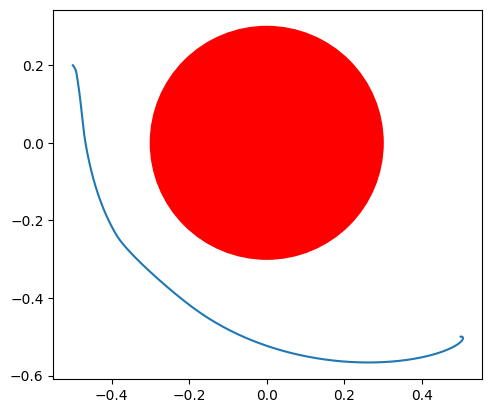

In [156]:
plt.plot(xs[:, 0], xs[:, 1])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.add_patch(plt.Circle((0, 0), 0.3, color='r'))

In [5]:
batch = dyn.sample(jax.random.PRNGKey(42), 1024)

In [6]:
batch_safe = batch[dyn.is_safe(batch)]
batch_unsafe = batch[dyn.is_unsafe(batch)]

In [7]:
batch_safe.shape[0]

326

In [8]:
batch_unsafe.shape[0]

538

In [75]:
rng = jax.random.PRNGKey(42)

In [80]:
rng, key = jax.random.split(rng)
batch = dyn.sample(key, 1024)
batch

Array([[ 0.52986141,  0.57036639,  0.22354397, -0.39493717],
       [ 0.89166121,  0.94983967, -0.06451941, -1.25301211],
       [ 0.46099743,  0.00714844, -0.60237391,  1.09808875],
       ...,
       [ 0.53444573, -0.7231524 , -1.02482997, -0.60175419],
       [-0.07966838, -0.08383476, -0.61517435,  0.12597918],
       [-0.55937916, -0.68599718, -0.7898645 ,  1.22500508]],      dtype=float64)